# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

As stated in the attached CRISP-DM-BANK.pdf, the data for directed marketing campaigns is collected from a Portugese bank primarily through telephone and occassional auxillary use of online banking channels. 
The dataset is an **aggregate of 17 marketing campaigns** that occured between May 2008 and Novembeer 2010 corresponding to 79354 contacts - further reduced to 45211 instances.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [644]:
import pandas as pd

In [645]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [646]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [647]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [648]:
# Check for missing fields
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [650]:
# Identify categorical columns with "unknown" values

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: \n {categorical_cols}")
for col in categorical_cols:
    print(f"{col}\n=======\nUnique Values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Count of unknown values: {(df[col].values == 'unknown').sum()}")


Categorical columns: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
job
Unique Values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Number of unique values: 12
Count of unknown values: 330
marital
Unique Values: ['married' 'single' 'divorced' 'unknown']
Number of unique values: 4
Count of unknown values: 80
education
Unique Values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Number of unique values: 8
Count of unknown values: 1731
default
Unique Values: ['no' 'unknown' 'yes']
Number of unique values: 3
Count of unknown values: 8597
housing
Unique Values: ['no' 'yes' 'unknown']
Number of unique values: 3
Count of unknown values: 990
loan
Unique Values: ['no' 'yes' 'unknown']
Number of unique values: 3
Count of unknown values: 990
contact
Unique V

In [651]:
df.nunique().sort_values()

y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

#### EDA

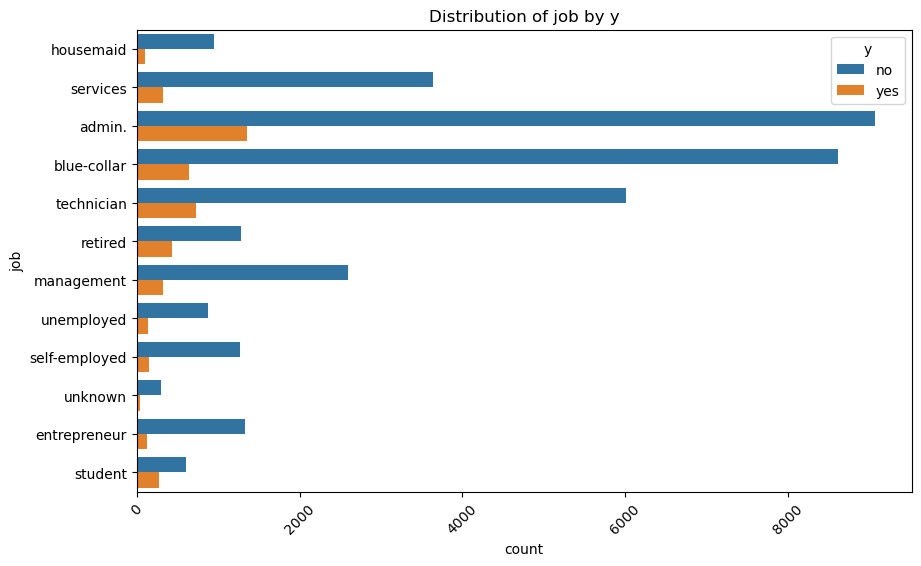

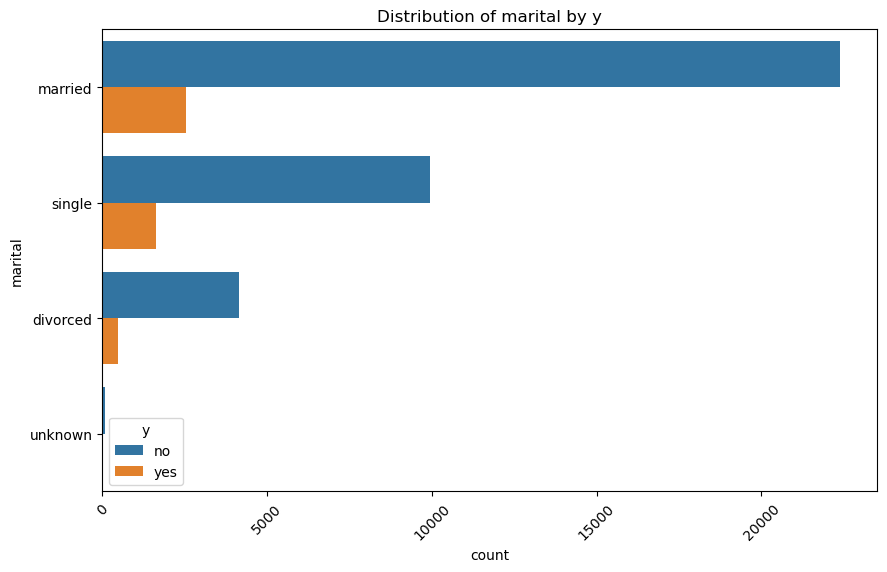

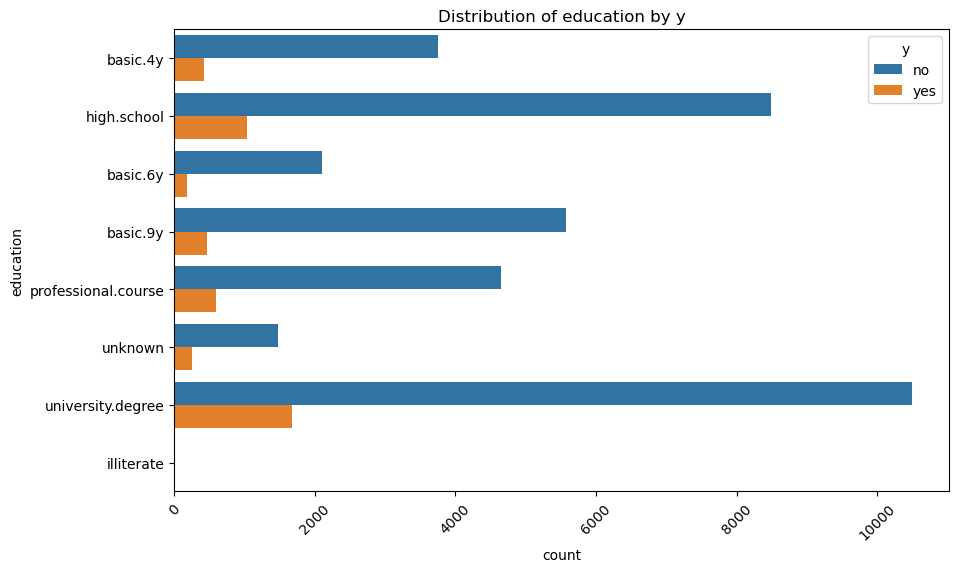

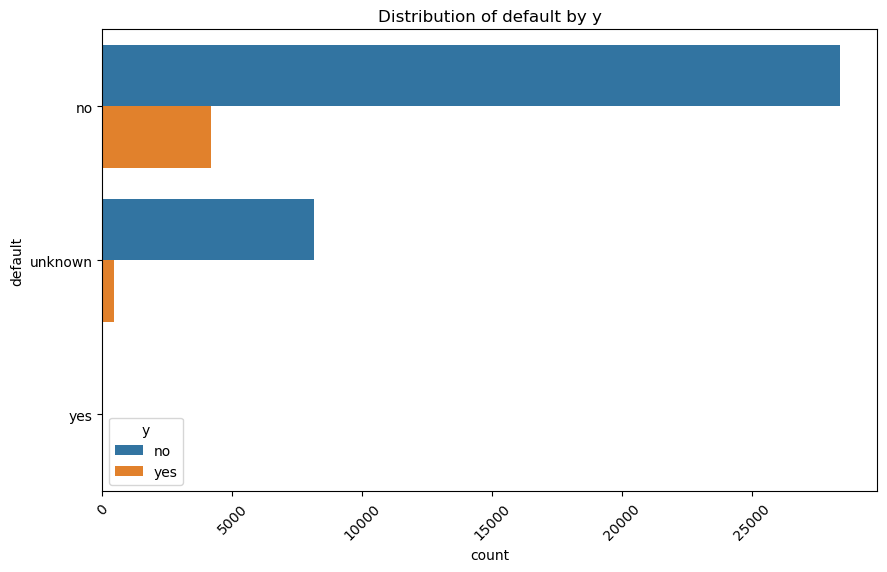

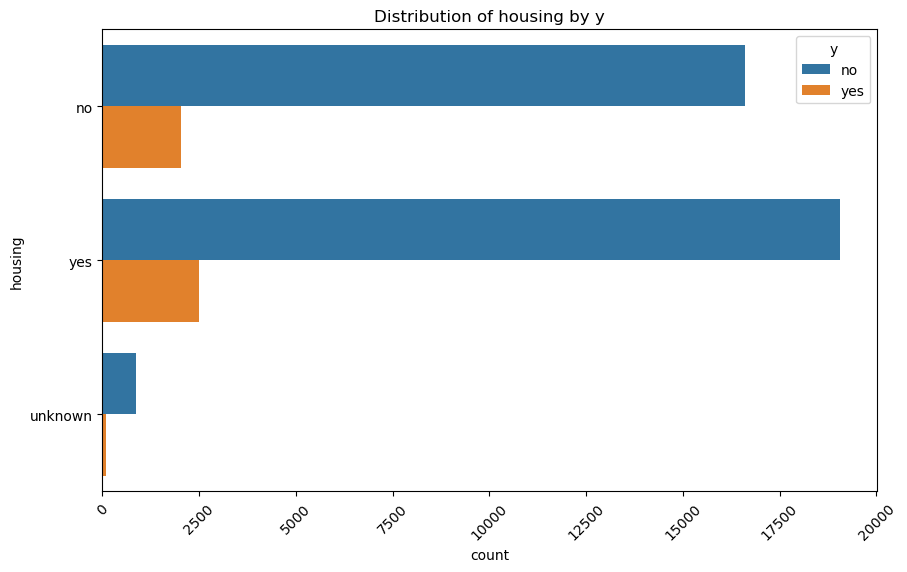

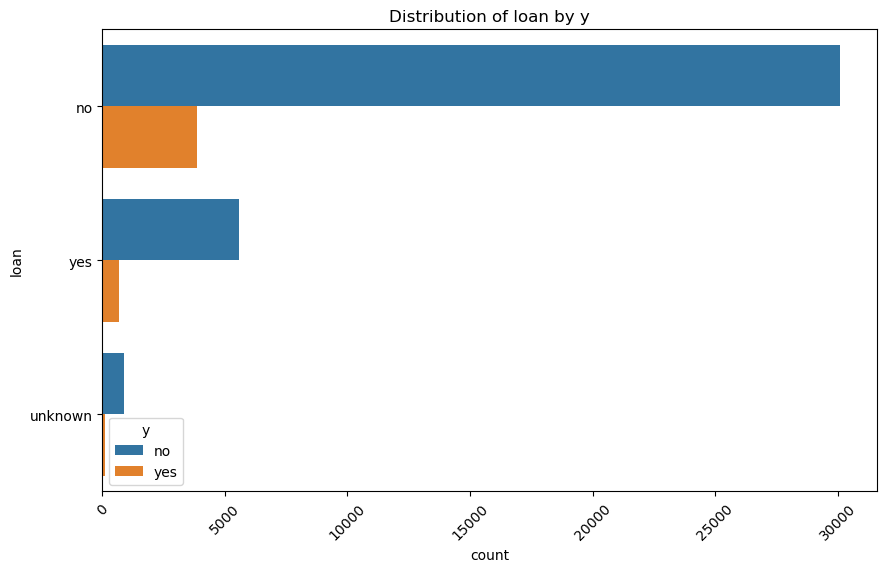

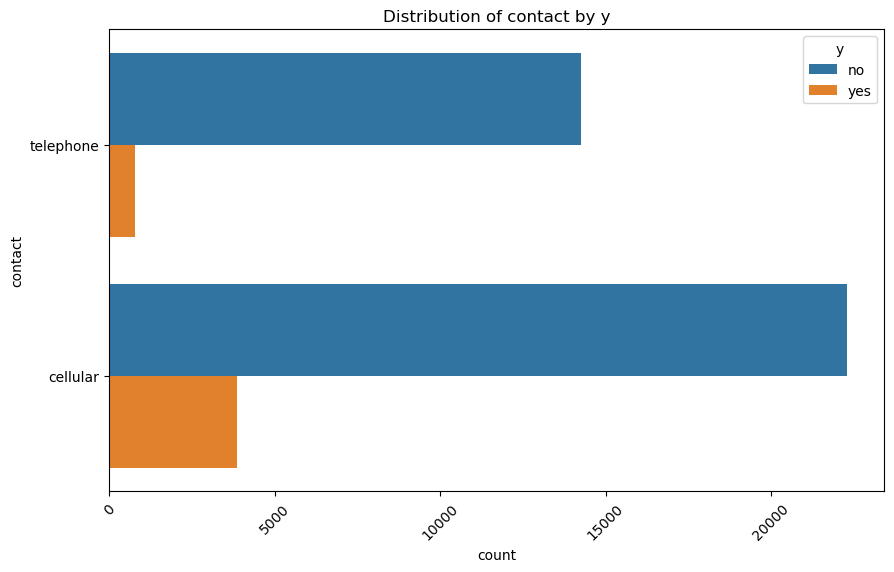

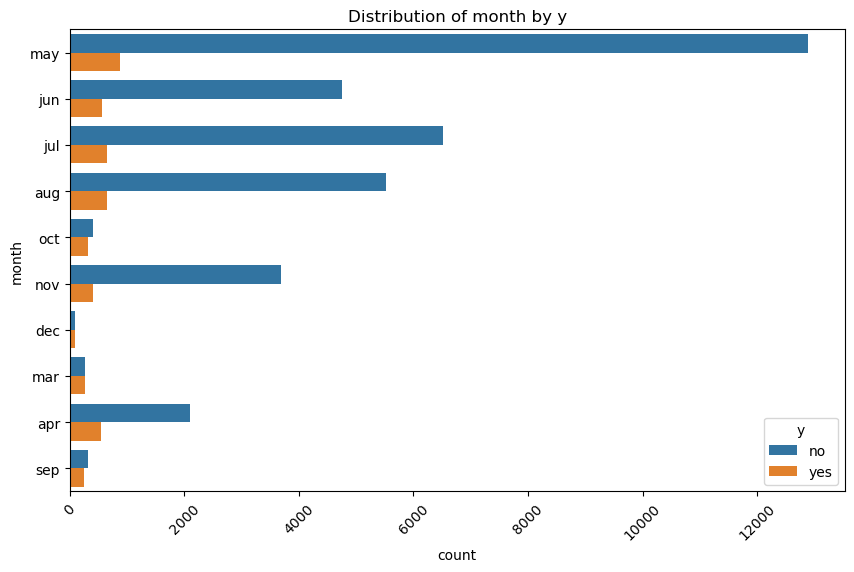

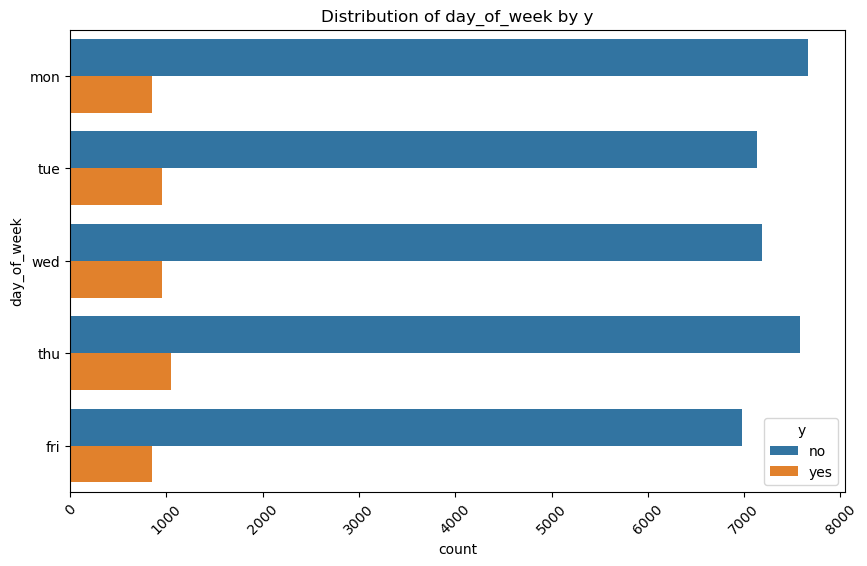

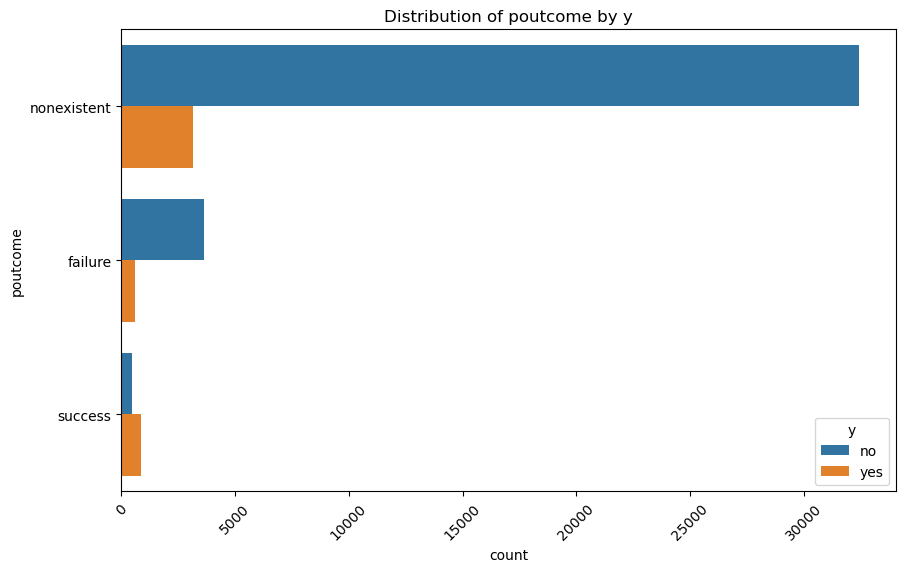

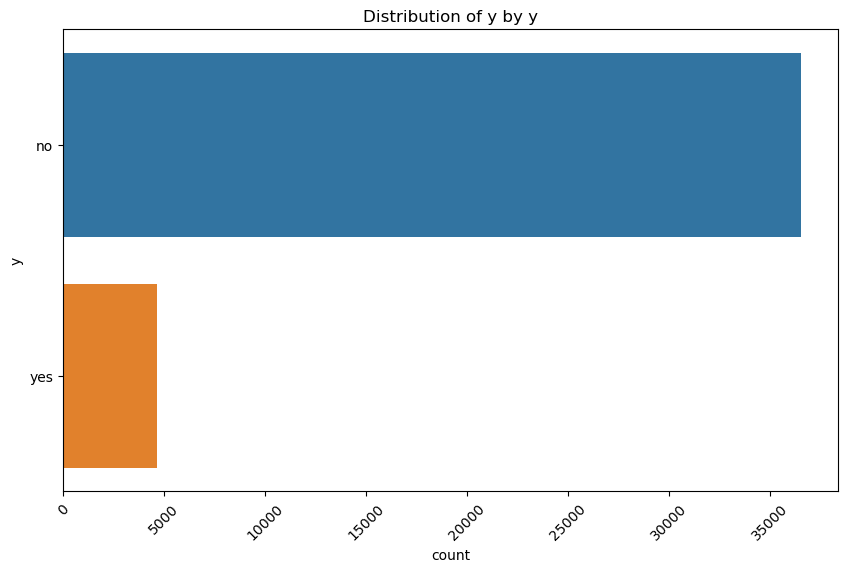

In [652]:
import matplotlib.pyplot as plt
import seaborn as sns

#drop_features = ['contact','month','day_of_week','campaign','pdays','previous','poutcome','nr.employed']

# Distribution of categorical features
for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, y=col, hue='y')
    plt.title(f'Distribution of {col} by y')
    plt.xticks(rotation=45)
    plt.show()

<Axes: >

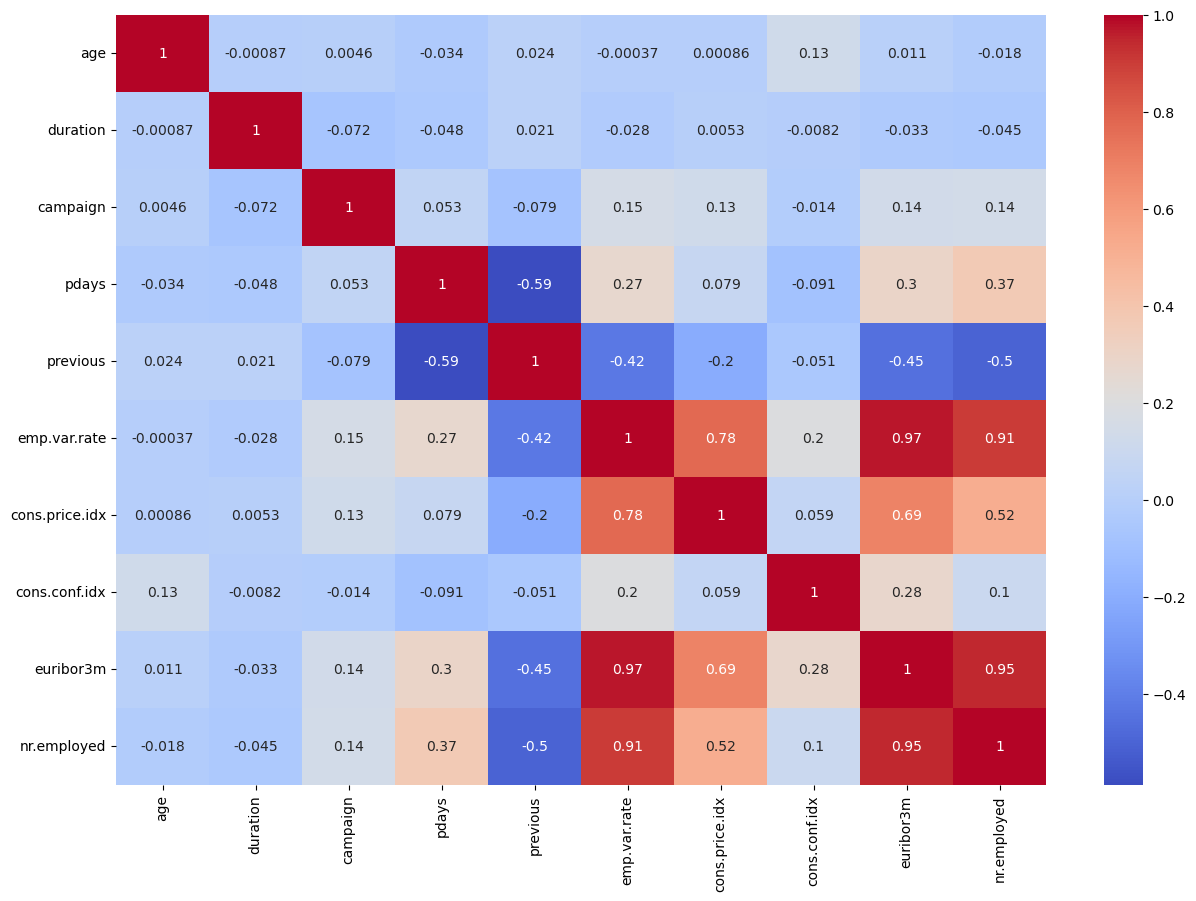

In [653]:
# Check correlation of numeric columns

plt.figure(figsize=(15, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

After examining the dataset, data can be grouped to 3 categories - client profile, campaign attributes and previous data, and economic attributes.

**The business objective of the task is to predict if a client will subscribe to a term deposit based on the above features. This would help the bank target clients effectively, reducing campaining expense and improving marketing efficiency.**

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

#### Data Preprocessing

In [654]:
df.shape

(41188, 21)

In [655]:
# Drop rows with 'unknown' value

df_clean = df[~(df=='unknown').any(axis=1)]
df_clean.shape

(30488, 21)

In [656]:
# Drop 'duration' as it is a post-event variable not a client attribute and impact accuracy score of a predictive model. 
# This feature can be used for success measurement as post-call analysis
df_clean = df_clean.drop(columns=['duration'])
df_clean.shape

(30488, 20)

In [657]:
# Replace 'yes' with 1 and 'no' with 0

df_clean = df_clean.replace('yes', 1)
df_clean = df_clean.replace('no', 0)
df_clean.head()

/var/folders/dc/wg2_60f93vn1cpc4d59w67fw0000gp/T/ipykernel_78708/3895949777.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_clean.replace('no', 0)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [658]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  int64  
 5   housing         30488 non-null  int64  
 6   loan            30488 non-null  int64  
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  campaign        30488 non-null  int64  
 11  pdays           30488 non-null  int64  
 12  previous        30488 non-null  int64  
 13  poutcome        30488 non-null  object 
 14  emp.var.rate    30488 non-null  float64
 15  cons.price.idx  30488 non-null  float64
 16  cons.conf.idx   30488 non-null  float64
 17  euribor3m       30488 non-null  floa

In [659]:
# Gather numerical and categorical features

X = df_clean.drop(['y'], axis=1, inplace=False)
y = df_clean['y']

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

print(f"Categorical features: {cat_cols} \nNumerical features: {num_cols}")


Categorical features: ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'] 
Numerical features: ['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [660]:

# Create preprocessor pipeline with StandardScaler on numerical features and OneHotEncoding on Categorical features

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

cat_transformer = Pipeline ([('ohe', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline([('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[('num', num_transformer, num_cols),
                  ('cat', cat_transformer, cat_cols)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'default', 'housing', 'loan',
                                  'campaign', 'pdays', 'previous',
                                  'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m',
                                  'nr.employed']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['job', 'marital', 'education', 'contact',
                                  'month', 'day_of_week', 'poutcome'])])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [661]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"TrainData:\n{X_train.shape}\n{y_train.shape}\n\nTestData:\n{X_test.shape}\n{y_test.shape}")


TrainData:
(24390, 19)
(24390,)

TestData:
(6098, 19)
(6098,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [662]:
# Find if the dataset is imbalanced - 87% no and 13% yes
print(df_clean['y'].value_counts(normalize=True))


y
0    0.873426
1    0.126574
Name: proportion, dtype: float64


In [663]:
# Determine the baseline score using DummyClassifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_train_score = dummy_clf.score(X_train, y_train)
baseline_test_score = dummy_clf.score(X_test, y_test)

print(f"Baseline Train Accuracy: {baseline_train_score *100:.2f}%")
print(f"Baseline Test Accuracy: {baseline_test_score*100:.2f}%")


Baseline Train Accuracy: 87.43%
Baseline Test Accuracy: 86.98%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [664]:
from sklearn.linear_model import LogisticRegression

lgr_pipeline = Pipeline([('preprocessor', preprocessor), ('lgr', LogisticRegression())])
lgr = lgr_pipeline.fit(X_train,y_train)
lgr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'default', 'housing',
                                                   'loan', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('lgr', LogisticRegression())])

### Problem 9: Score the Model

What is the accuracy of your model?

In [665]:
lgr_train_score = lgr.score(X_train,y_train)
lgr_test_score = lgr.score(X_test,y_test)

print(f"LogisticRegression Accuracy Scores(Default)")
print(f"Train Accuracy: {lgr_train_score*100:.2f}%")
print(f"Test Accuracy: {lgr_test_score*100:.2f}%")

LogisticRegression Accuracy Scores(Default)
Train Accuracy: 89.00%
Test Accuracy: 88.57%


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our dt algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [666]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [667]:
#Define the model
models = {
    'KNN': (KNeighborsClassifier()),
    'Logistic Regression': (LogisticRegression()),
    'SVM': (SVC()),
    'Decision Tree': (DecisionTreeClassifier())
}

In [668]:
import time

results = []

#Fit each model and time it
for name, model in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])
    # Fit the model and time it
    start_time = time.time()
    clf = pipeline.fit(X_train, y_train)
    fit_time = (time.time() - start_time)

    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test, y_test)

    results.append([name, train_score, test_score, fit_time])

results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Fit Time' ])
results_df.set_index('Model', inplace=True)

results_df.to_json('data/model_results.json')
results_df

,Train Accuracy,Test Accuracy,Fit Time
Model,,,
KNN,0.905207,0.878321,0.088422
Logistic Regression,0.890037,0.885700,0.190873
SVM,0.895941,0.886028,46.264468
Decision Tree,0.994383,0.823713,0.195709


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in dt or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [669]:
# Define the models and hyperparameters
'''
models = {
    'dt': (KNeighborsClassifier(), {'dt__n_neighbors': [3, 5, 7], 'dt__weights': ['uniform','distance'], 'dt__p': [1,2]}),
    'lgr': (LogisticRegression(max_iter=1000), {'lgr__C': [0.01, 0.1, 1, 10], 'lgr__class_weight': [None,'balanced']}),
    'svm': (SVC(), {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf'],'svm__class_weight': [None,'balanced']}),
    'dt': (DecisionTreeClassifier(), {'dt__criterion': ['gini','entropy'],'dt__max_depth': [5, 10, 15], 'dt__class_weight': [None,'balanced']})
}
'''

"\nmodels = {\n    'dt': (KNeighborsClassifier(), {'dt__n_neighbors': [3, 5, 7], 'dt__weights': ['uniform','distance'], 'dt__p': [1,2]}),\n    'lgr': (LogisticRegression(max_iter=1000), {'lgr__C': [0.01, 0.1, 1, 10], 'lgr__class_weight': [None,'balanced']}),\n    'svm': (SVC(), {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf'],'svm__class_weight': [None,'balanced']}),\n    'dt': (DecisionTreeClassifier(), {'dt__criterion': ['gini','entropy'],'dt__max_depth': [5, 10, 15], 'dt__class_weight': [None,'balanced']})\n}\n"

In [670]:
'''
results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print(f"Model: {name}\nBest params: {grid_search.best_params_}\n")
    if name == 'dt':
        best_dt = best_model.named_steps['dt']
        importances = best_dt.feature_importances_
        feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
        # Visualize feature importance
        plt.figure(figsize=(8, 6))
        sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
        plt.title("Top 10 Important Features (Decision Tree - Tuned)")
        plt.xlabel("Feature Importance")
        plt.ylabel("Feature")
        plt.show()

    # Append the results
    results.append([name, train_score, test_score, fit_time])
'''

'\nresults = []\n\nfor name, (model, params) in models.items():\n    # Create a pipeline\n    pipeline = Pipeline([\n        (\'preprocessor\', preprocessor),\n        (name, model)\n    ])\n    \n    # Perform grid search\n    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)\n    \n    # Fit the model and time it\n    start_time = time.time()\n    grid_search.fit(X_train, y_train)\n    fit_time = (time.time() - start_time) / len(grid_search.cv_results_[\'mean_fit_time\'])\n    \n    # Get the best estimator\n    best_model = grid_search.best_estimator_\n    \n    # Evaluate on training and test sets\n    train_score = best_model.score(X_train, y_train)\n    test_score = best_model.score(X_test, y_test)\n\n    print(f"Model: {name}\nBest params: {grid_search.best_params_}\n")\n    if name == \'dt\':\n        best_dt = best_model.named_steps[\'dt\']\n        importances = best_dt.feature_importances_\n        feature_names = best_model.named_steps[\'preprocessor\

In [671]:
#Hyperparameter tuning and grid search

from sklearn.model_selection import GridSearchCV

results = []

In [672]:
# KNN Classification
knn_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('knn', KNeighborsClassifier())])
knn_params = {'knn__n_neighbors': [3, 5, 7], 'knn__weights': ['uniform','distance'], 'knn__p': [1,2]}
knn_grid = GridSearchCV(knn_pipe, param_grid=knn_params, cv=5, n_jobs=-1)

# Fit the model and time it
start_time = time.time()
knn_grid.fit(X_train, y_train)
fit_time = (time.time() - start_time) / len(knn_grid.cv_results_['mean_fit_time'])

knn_best_model = knn_grid.best_estimator_

 # Evaluate on training and test sets
knn_train_score = knn_best_model.score(X_train, y_train)
knn_test_score = knn_best_model.score(X_test, y_test)

# Append the results
results.append(['KNN', knn_train_score, knn_test_score, fit_time])

In [673]:
# Logistic Regression
lgr_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('lgr', LogisticRegression(max_iter=1000))])
lgr_params = {'lgr__C': [0.01, 0.1, 1, 10], 'lgr__class_weight': [None,'balanced']}
lgr_grid = GridSearchCV(lgr_pipe, param_grid=lgr_params, cv=5, n_jobs=-1)

# Fit the model and time it
start_time = time.time()
lgr_grid.fit(X_train, y_train)
fit_time = (time.time() - start_time) / len(lgr_grid.cv_results_['mean_fit_time'])

lgr_best_model = lgr_grid.best_estimator_

 # Evaluate on training and test sets
lgr_train_score = lgr_best_model.score(X_train, y_train)
lgr_test_score = lgr_best_model.score(X_test, y_test)

# Append the results
results.append(['Logistic Regression', lgr_train_score, lgr_test_score, fit_time])

In [675]:
# SVM Classifier
svm_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('svm', SVC())])
#svm_params = {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf'],'svm__class_weight': [None,'balanced']}
svm_params = {'svm__C': [0.1, 1, 10], 'svm__kernel': ['rbf'], 'svm__class_weight': [None]}
svm_grid = GridSearchCV(svm_pipe, param_grid=svm_params, cv=5, n_jobs=-1)

# Fit the model and time it
start_time = time.time()
svm_grid.fit(X_train, y_train)
fit_time = (time.time() - start_time) / len(svm_grid.cv_results_['mean_fit_time'])

svm_best_model = svm_grid.best_estimator_

 # Evaluate on training and test sets
svm_train_score = svm_best_model.score(X_train, y_train)
svm_test_score = svm_best_model.score(X_test, y_test)

# Append the results
results.append(['SVM', svm_train_score, svm_test_score, fit_time])

In [676]:
#Decision Tree Classifier
dt_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('dt', DecisionTreeClassifier())])
dt_params = {'dt__criterion': ['gini','entropy'],'dt__max_depth': [5, 10, 15], 'dt__class_weight': [None,'balanced']}
dt_grid = GridSearchCV(dt_pipe, param_grid=dt_params, cv=5, n_jobs=-1)

# Fit the model and time it
start_time = time.time()
dt_grid.fit(X_train, y_train)
fit_time = (time.time() - start_time) / len(dt_grid.cv_results_['mean_fit_time'])

dt_best_model = dt_grid.best_estimator_

 # Evaluate on training and test sets
dt_train_score = dt_best_model.score(X_train, y_train)
dt_test_score = dt_best_model.score(X_test, y_test)

# Append the results
results.append(['Decision Tree', dt_train_score, dt_test_score, fit_time])

In [677]:
# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Average fit time'])
results_df.set_index('Model', inplace=True)

# Save to JSON (for submission if needed)
results_df.to_json('data/improved_model_results.json')

In [678]:
clf_df = pd.read_json(r'data/improved_model_results.json')
clf_df

,Train Accuracy,Test Accuracy,Average fit time
KNN,0.899836,0.878649,2.883858
Logistic Regression,0.890160,0.884060,0.521086
SVM,0.895941,0.886028,65.294466
Decision Tree,0.892538,0.886520,0.386257


In [681]:
print(f"Best params:\nKNN: {knn_grid.best_params_}\nLogisticRegression: {lgr_grid.best_params_}\nSVM: {svm_grid.best_params_}\nDecisionTree: {dt_grid.best_params_}")

Best params:
KNN: {'knn__n_neighbors': 7, 'knn__p': 2, 'knn__weights': 'uniform'}
LogisticRegression: {'lgr__C': 0.01, 'lgr__class_weight': None}
SVM: {'svm__C': 1, 'svm__class_weight': None, 'svm__kernel': 'rbf'}
DecisionTree: {'dt__class_weight': None, 'dt__criterion': 'entropy', 'dt__max_depth': 5}


/var/folders/dc/wg2_60f93vn1cpc4d59w67fw0000gp/T/ipykernel_78708/3291458984.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')


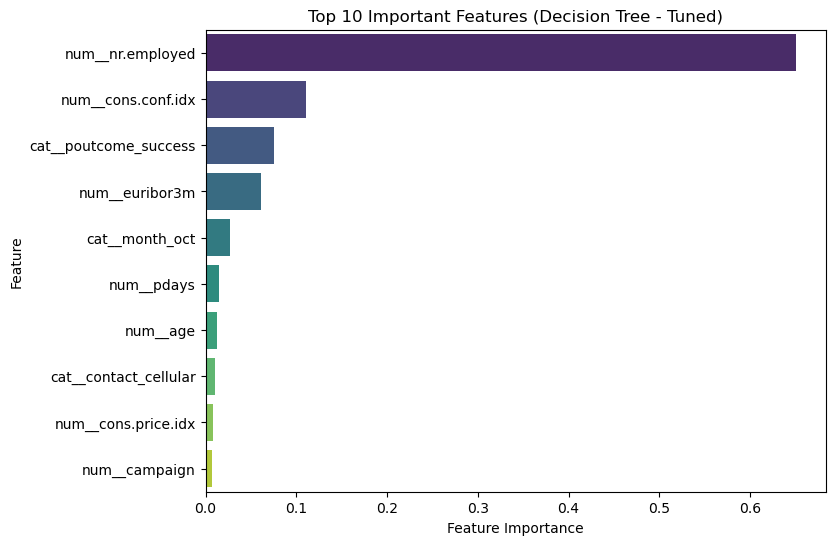

In [682]:
# Feature Importance on tuned DecisionTree Classifier

best_dt = dt_best_model.named_steps['dt']
importances = best_dt.feature_importances_
feature_names = dt_best_model.named_steps['preprocessor'].get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features (Decision Tree - Tuned)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

## Findings

### Comparing accuracy score and fit time between classifiers

#### Baseline accuracy: 

- Baseline Train Accuracy: 87.43%
- Baseline Test Accuracy: 86.98%

#### Default settings:

- All models outperform the baseline (~87%) on the test set.
- Logistic Regression and SVM both yield the best test accuracy (88.5-88.6%).
- The Decision Tree clearly overfits, achieving 99% on training but drops to 82% on test data.
- KNN performs decently but is computationally heavier for larger datasets.

#### Improving the model with hyperparameters and GridSearchCV:

- Hyperparameter tuning improved Decision Tree performance significantly — the test accuracy rose from 82% → 88.7% with reduced overfitting and better generalization (depth limited to 5).
- SVM remains competitive in accuracy but has very high training time (~65 s).
- Logistic Regression remained stable and consistent
- KNN showed minimal improvement and moderate runtime increase

Choosing the tuned Decision Tree (max_depth=5, criterion='entropy') to investigate feature importance — it balances strong performance with transparent, actionable insights on what drives customer subscriptions.

#### Feature Importance

- Macroeconomic factors such as labor market conditions (nr_employed), how confident consumers feel about the economy (cons.conf.indx) and interest rate(euribor3m) are few of the top 10 features that influence the subscription probabilty
- Targeting clients who have shown previous outcome as succesful would also increase the effectiveness of the campaign

## Next Steps and Recommendations

Since the data is imbalanced (≈88% “no”), focus on metrics that better reflect minority-class performance:

- Precision, Recall, F1-score for class y = "yes".
- ROC-AUC score and confusion matrix to assess trade-offs.

A marketing campaign while the economic conditions are healthy and stable, would give better insights on the impact on client profile and campaign specific attributes.
